In [15]:
from fastbook import *
from fastai.vision.widgets import *
import pandas as pd

In [14]:
path = Path('C:\\Users\\ievas.BSENSOR\\.kaggle\\myntradataset\\')

In [17]:
df = pd.read_csv((path/'styles.csv'),  nrows=6042)
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt


In [18]:
df.masterCategory.describe()

count        6042
unique          6
top       Apparel
freq         2828
Name: masterCategory, dtype: object

In [19]:
df.masterCategory.value_counts()

Apparel           2828
Accessories       1561
Footwear          1299
Personal Care      336
Free Items          17
Sporting Goods       1
Name: masterCategory, dtype: int64

In [20]:
df = df[~df.masterCategory.str.contains("Sporting Goods")]
df.masterCategory.value_counts()

Apparel          2828
Accessories      1561
Footwear         1299
Personal Care     336
Free Items         17
Name: masterCategory, dtype: int64

In [22]:
dirs = ["{}.jpg".format(i) for i in df.id]
df["new"] = dirs
df.new.head()

0    15970.jpg
1    39386.jpg
2    59263.jpg
3    21379.jpg
4    53759.jpg
Name: new, dtype: object

In [23]:
dls = ImageDataLoaders.from_df(df, path=path,  fn_col=-1, folder='images', label_col=2, item_tfms=[Resize(224)])

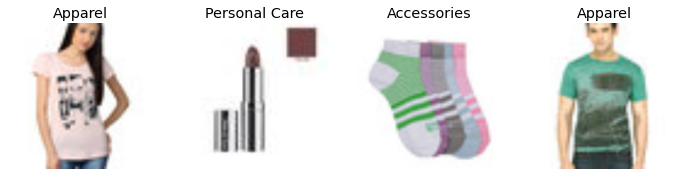

In [24]:
dls.valid.show_batch(max_n=4, nrows=1)

In [28]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn_inf = learn.load(path/'export')
learn_inf.dls.vocab

['Accessories', 'Apparel', 'Footwear', 'Free Items', 'Personal Care']

In [56]:
btn_run = widgets.Button(description='Classify')
btn_upload = widgets.FileUpload()

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    #img =  PILImage(img.resize(size = (224,224)))
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(224,224))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
    
btn_run.on_click(on_click_classify)    

In [57]:
VBox([widgets.Label('Select your item!'), btn_upload, btn_run, out_pl, lbl_pred])

In [58]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbdev 1.1.11 requires nbconvert<6, but you have nbconvert 6.0.7 which is incompatible.



  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1


Enabling: voila
- Writing config: C:\Users\ievas.BSENSOR\Anaconda3\etc\jupyter
    - Validating...
      voila 0.2.6 ok
